In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model, neighbors, ensemble, naive_bayes, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn import preprocessing

import plotly
plotly.tools.set_credentials_file(username='extralime', api_key='q3tUGZrv40fkKyR4uPuL')
import plotly.plotly as py

from IPython.display import Image

import warnings

warnings.filterwarnings(
    module='scipy',
    action='ignore',
    message='Using a')

def model(X_train,X_test, y_train, y_test):
    knn = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print('Results of KNN:\n')
    print('\nClassification Report:KNN\n')
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cbar=False)
    plt.show()
    print('ROC_AUC _SCORE:')
    print(roc_auc_score(y_test,y_pred))
    rfc = ensemble.RandomForestClassifier(n_estimators=250, class_weight='balanced',criterion='entropy')
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    print('\n\nResults of Random Forest:\n')
    print('\nClassification Report:RFC\n')
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cbar=False)
    plt.show()
    print('ROC_AUC _SCORE:')
    print(roc_auc_score(y_test,y_pred))
    svc = svm.SVC(kernel='linear',C=10)
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_test)
    print('\n\nResults of SVC:\n')
    print('\nClassification Report: SVC\n')
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cbar=False)
    plt.show()
    print('ROC_AUC _SCORE:')
    print(roc_auc_score(y_test,y_pred))
    lrc = linear_model.LogisticRegression(C=10, penalty='l1')
    lrc.fit(X_train,y_train)
    y_pred = lrc.predict(X_test)
    print('\n\nResults of Logistic Regression (lasso):\n')
    print('\nClassification Report:LR1\n')
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cbar=False)
    plt.show()
    print('ROC_AUC _SCORE:')
    print(roc_auc_score(y_test,y_pred))
    lrc = linear_model.LogisticRegression(C=10, penalty='l2')
    lrc.fit(X_train,y_train)
    y_pred = lrc.predict(X_test)
    print('\n\nResults of Logistic Regression (Ridge):\n')
    print('\nClassification Report:LR2\n')
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cbar=False)
    plt.show()
    print('ROC_AUC _SCORE:')
    print(roc_auc_score(y_test,y_pred))
    gbc = ensemble.GradientBoostingClassifier(n_estimators=500,max_depth=4,loss='exponential')
    gbc.fit(X_train,y_train)
    y_pred = gbc.predict(X_test)
    print('\n\nResults of Gradient Boosting:\n')
    print('\nClassification Report:GBC\n')
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cbar=False)
    plt.show()
    print('ROC_AUC _SCORE:')
    print(roc_auc_score(y_test,y_pred))

In [53]:
df = pd.read_csv('lemon_train.csv')

In [279]:
df.head(25)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
5,6,0,12/7/2009,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,...,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594
6,7,0,12/7/2009,ADESA,2004,5,KIA,SPECTRA,EX,4D SEDAN EX,...,6230.0,8603.0,NaN,NaN,19638,33619,FL,4200.0,0,533
7,8,0,12/7/2009,ADESA,2005,4,FORD,TAURUS,SE,4D SEDAN SE,...,6942.0,8242.0,NaN,NaN,19638,33619,FL,4500.0,0,825
8,9,0,12/7/2009,ADESA,2007,2,KIA,SPECTRA,EX,4D SEDAN EX,...,9637.0,10778.0,NaN,NaN,21973,33619,FL,5600.0,0,482
9,10,0,12/7/2009,ADESA,2007,2,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,...,12580.0,14845.0,NaN,NaN,21973,33619,FL,7700.0,0,1633


In [55]:
df.AUCGUART.value_counts()

GREEN    3340
RED        79
Name: AUCGUART, dtype: int64

In [56]:
import plotly.graph_objs as go


x0 = df.MMRAcquisitionAuctionAveragePrice

trace1 = go.Histogram(
    x=x0,
    opacity=0.75)

data = [trace1]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

/root/.pyenv/versions/3.6.0/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [27]:
import colorlover as cl
from IPython.display import HTML
print(HTML(cl.to_html( cl.scales['9']['div']['RdYlBu'] )))
colors = cl.to_rgb(cl.scales['10']['div']['BrBG'])
colors

<IPython.core.display.HTML object>


['rgb(84,48,5)',
 'rgb(140,81,10)',
 'rgb(191,129,45)',
 'rgb(223,194,125)',
 'rgb(246,232,195)',
 'rgb(199,234,229)',
 'rgb(128,205,193)',
 'rgb(53,151,143)',
 'rgb(1,102,94)',
 'rgb(0,60,48)']

In [26]:
HTML(cl.to_html( cl.scales['9']['div']['BrBG'] ))

In [78]:
colors

['rgb(84,48,5)',
 'rgb(140,81,10)',
 'rgb(191,129,45)',
 'rgb(223,194,125)',
 'rgb(246,232,195)',
 'rgb(199,234,229)',
 'rgb(128,205,193)',
 'rgb(53,151,143)',
 'rgb(1,102,94)',
 'rgb(0,60,48)']

In [84]:
colors = cl.to_numeric(colors)
colors = cl.to_hsl(colors)
colors

['hsl(33, 89%, 17%)',
 'hsl(33, 87%, 29%)',
 'hsl(35, 62%, 46%)',
 'hsl(42, 60%, 68%)',
 'hsl(44, 74%, 86%)',
 'hsl(171, 45%, 85%)',
 'hsl(171, 44%, 65%)',
 'hsl(175, 48%, 40%)',
 'hsl(175, 98%, 20%)',
 'hsl(168, 100%, 12%)']

In [ ]:
x0 = df.MMRAcquisitionAuctionAveragePrice

trace1 = go.Histogram(
    x=x0,
    opacity=0.75)

data = [trace1]
layout = go.Layout(barm

In [30]:
df.dtypes

RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrent

In [122]:
stockmakes = df.Make.value_counts().reset_index()[:10].sort_values(by='Make')

In [123]:
stockmakes

,index,Make
9,JEEP,1644
8,HYUNDAI,1811
7,NISSAN,2085
6,SATURN,2163
5,KIA,2484
4,PONTIAC,4258
3,CHRYSLER,8844
2,FORD,11305
1,DODGE,12912
0,CHEVROLET,17248


In [ ]:
data = []
for i in range(10):
    trace = go.Bar(
    y=stockmakes['index'][i],
    x=stockmakes.Make[i],
    orientation = 'h',
    marker = dict(
    color = colors[i]

In [93]:
len(colors)

10

In [92]:
stockmakes.Make[0]

17248

In [97]:
colors = cl.to_rgb(colors)

In [98]:
colors

['rgb(82, 47, 5)',
 'rgb(138, 80, 10)',
 'rgb(190, 129, 45)',
 'rgb(222, 193, 124)',
 'rgb(246, 232, 193)',
 'rgb(200, 234, 229)',
 'rgb(126, 205, 193)',
 'rgb(53, 151, 143)',
 'rgb(1, 101, 93)',
 'rgb(0, 61, 49)']

In [114]:
x2 = 

In [127]:
df.Nationality.unique()

array(['OTHER ASIAN', 'AMERICAN', 'TOP LINE ASIAN', 'OTHER', nan],
      dtype=object)

In [125]:
nation = df.Nationality.value_counts().reset_index().sort_values(by='Nationality')
nation

,index,Nationality
3,OTHER,195
2,TOP LINE ASIAN,3722
1,OTHER ASIAN,8033
0,AMERICAN,61028


In [160]:
x = list(nation.Nationality)
y = list(nation['index'])
trace1 = go.Bar(
    x=x2,
    y=y,
    orientation = 'h',
    marker = dict(
    color = colors
        
    )
)
trace2 = go.Bar(
    x=x,
    y=y,
    orientation = 'h',
    marker = dict(
    color = colors[5:]
        
    )
)


data = [trace2]

fig = go.Figure(data=data)
py.iplot(fig, filename='nation')

In [179]:
plodf = 

,VehYear,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost
0,2001,2831.582039,3752.988521,4425.323430,5498.975692,2885.062965,3815.591740,4670.718348,5760.503724,4783.818028
1,2002,3465.906608,4480.409985,5165.341263,6323.536858,3520.013549,4543.667158,5424.122533,6601.666274,5386.123348
2,2003,4320.002570,5454.244177,6206.238394,7471.123213,4343.285576,5483.376573,6476.094063,7754.151500,6042.741208
3,2004,4996.823529,6238.421667,7038.925294,8414.764804,5000.774552,6240.798071,7338.384373,8715.710687,6476.195552
4,2005,5601.968750,6914.032154,7789.342523,9239.055333,5582.250049,6898.472998,8055.749692,9520.216467,6535.958864
5,2006,6686.941560,8059.365781,9126.889280,10606.092707,6643.073433,8019.068844,9377.123213,10864.454134,6873.400527
6,2007,7711.329800,9055.279345,10603.524877,12015.033111,7705.149233,9067.245243,10864.997107,12289.039895,7326.492006
7,2008,8321.401511,9289.771790,11316.235038,12325.675915,8429.657613,9472.964322,11758.796506,12813.348113,7726.887149
8,2009,8858.973236,9535.428224,12475.105839,13226.967153,9195.418023,9962.287860,12570.964956,13463.493116,8285.011788
9,2010,13278.000000,14529.000000,17097.000000,18745.000000,12840.000000,14549.000000,16419.000000,18374.000000,9270.000000


In [186]:
N=500
trace0 = go.Scatter(
    x = linedf.MMRAcquisitionAuctionAveragePrice,
    y = linedf.MMRCurrentAuctionAveragePrice,
    name = 'MMRAcquisitionAuctionAveragePrice',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = linedf.MMRCurrentAuctionAveragePrice,
    y = linedf.MMRAcquisitionAuctionAveragePrice,
    name = 'Below',
    mode = 'markers',
    marker = dict(
        size = 7,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Styled Scatter',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [197]:
linedf=linedf.dropna()

In [203]:
list(linedf)

['VehYear',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'VehBCost',
 'aaap_caap']

In [206]:
linedf['aaap_caap'] = linedf.MMRAcquisitionAuctionAveragePrice - linedf.MMRCurrentAuctionAveragePrice
linedf['aacp_cacp'] = linedf.MMRAcquisitionAuctionCleanPrice - linedf.MMRCurrentAuctionCleanPrice
linedf['arap_crap'] = linedf.MMRAcquisitionRetailAveragePrice - linedf.MMRCurrentRetailAveragePrice
linedf['arcp_crcp'] = linedf.MMRAcquisitonRetailCleanPrice - linedf.MMRCurrentRetailCleanPrice

In [207]:
linedf

,VehYear,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,aaap_caap,aacp_cacp,arap_crap,arcp_crcp
0,2001,2831.582039,3752.988521,4425.323430,5498.975692,2885.062965,3815.591740,4670.718348,5760.503724,4783.818028,-53.480926,-62.603219,-245.394918,-261.528032
1,2002,3465.906608,4480.409985,5165.341263,6323.536858,3520.013549,4543.667158,5424.122533,6601.666274,5386.123348,-54.106941,-63.257172,-258.781270,-278.129416
2,2003,4320.002570,5454.244177,6206.238394,7471.123213,4343.285576,5483.376573,6476.094063,7754.151500,6042.741208,-23.283006,-29.132396,-269.855669,-283.028288
3,2004,4996.823529,6238.421667,7038.925294,8414.764804,5000.774552,6240.798071,7338.384373,8715.710687,6476.195552,-3.951023,-2.376405,-299.459079,-300.945883
4,2005,5601.968750,6914.032154,7789.342523,9239.055333,5582.250049,6898.472998,8055.749692,9520.216467,6535.958864,19.718701,15.559156,-266.407169,-281.161134
5,2006,6686.941560,8059.365781,9126.889280,10606.092707,6643.073433,8019.068844,9377.123213,10864.454134,6873.400527,43.868126,40.296937,-250.233933,-258.361427
6,2007,7711.329800,9055.279345,10603.524877,12015.033111,7705.149233,9067.245243,10864.997107,12289.039895,7326.492006,6.180567,-11.965899,-261.472229,-274.006783
7,2008,8321.401511,9289.771790,11316.235038,12325.675915,8429.657613,9472.964322,11758.796506,12813.348113,7726.887149,-108.256102,-183.192533,-442.561468,-487.672198
8,2009,8858.973236,9535.428224,12475.105839,13226.967153,9195.418023,9962.287860,12570.964956,13463.493116,8285.011788,-336.444787,-426.859636,-95.859117,-236.525963
9,2010,13278.000000,14529.000000,17097.000000,18745.000000,12840.000000,14549.000000,16419.000000,18374.000000,9270.000000,438.000000,-20.000000,678.000000,371.000000


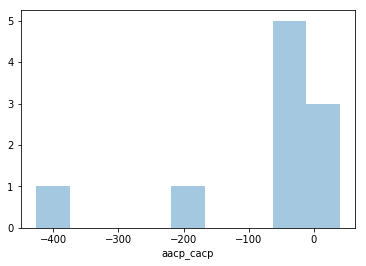

In [210]:
sns.distplot(linedf.aacp_cacp ,kde=False)

In [164]:
x = linedf.VehBCost

trace1 = go.Histogram(
    x=x,
    
    name='Milage',
    
    marker=dict(
        color=colors[7],
    ),
    opacity=0.75
)
layout = go.Layout(
    title='Acquisition Price',
    xaxis=dict(
        title='Cost'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
data = [trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='pricepaid')

/root/.pyenv/versions/3.6.0/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [170]:
df.Color.dropna(inplace=True)

In [171]:
df.Color.unique()

array(['RED', 'WHITE', 'MAROON', 'SILVER', 'BLACK', 'GOLD', 'GREY',
       'BLUE', 'BEIGE', 'PURPLE', 'ORANGE', 'GREEN', 'BROWN', 'YELLOW',
       'NOT AVAIL', 'OTHER'], dtype=object)

In [51]:
cats = ['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'Nationality', 'Size', 'TopThreeAmericanName','VNST','IsOnlineSale','IsBadBuy']

In [52]:
for col in cats:
    print(col,len(df[col].unique()))

Auction 3
Make 33
Model 1063
Trim 135
SubModel 864
Color 17
Transmission 4
WheelTypeID 5
Nationality 5
Size 13
TopThreeAmericanName 5
VNST 37
IsOnlineSale 2
IsBadBuy 2


In [131]:
df.TopThreeAmericanName.unique()

array(['OTHER', 'CHRYSLER', 'FORD', 'GM', nan], dtype=object)

In [67]:
df.VehYear = df.VehYear.astype("float64")
df.VehicleAge = df.VehicleAge.astype('float64')
df.VehOdo = df.VehOdo.astype('float64')
df.WarrantyCost = df.WarrantyCost.astype('float64')

In [68]:
df.dtypes

IsBadBuy                               int64
Auction                               object
VehYear                              float64
VehicleAge                           float64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                               float64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrentAuctionAveragePrice        float64
MMRCurrentAuctionCleanPrice          float64
MMRCurrent

[]

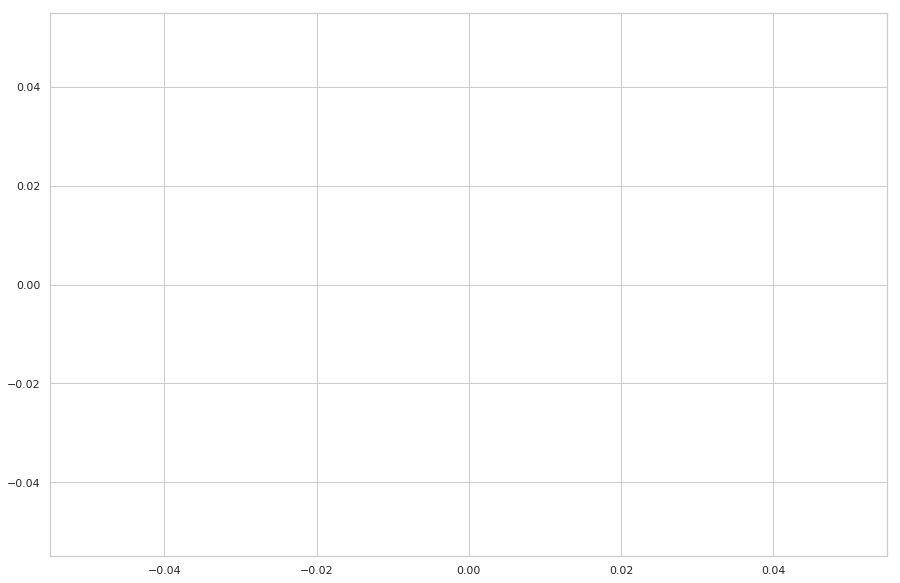

In [78]:
plt.figure(figsize=(15,10))
plt.plot(x=df.VehYear, y=df.MMRAcquisitionAuctionAveragePrice, label="AcqAucAvgPrive", color='g', linestyle='dotted', linewidth=3)

In [149]:
states1 = df.VNST.value_counts().reset_index().sort_values(by='VNST',ascending=False)
states2 = states1[:10]


In [150]:
states2

,index,VNST
0,TX,13596
1,FL,10447
2,CA,7095
3,NC,7042
4,AZ,6174
5,CO,4998
6,SC,4280
7,OK,3594
8,GA,2450
9,TN,1764


In [151]:
labels = states2['index']
values = states2.VNST
colors = colors

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=14),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

py.iplot([trace], filename='styled_pie_chart')

In [94]:
list(df.select_dtypes(['float64']))

['VehYear',
 'VehicleAge',
 'WheelTypeID',
 'VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'VehBCost',
 'WarrantyCost']

In [176]:
linedf = df.groupby('VehYear')[['MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'VehBCost']].mean().reset_index()

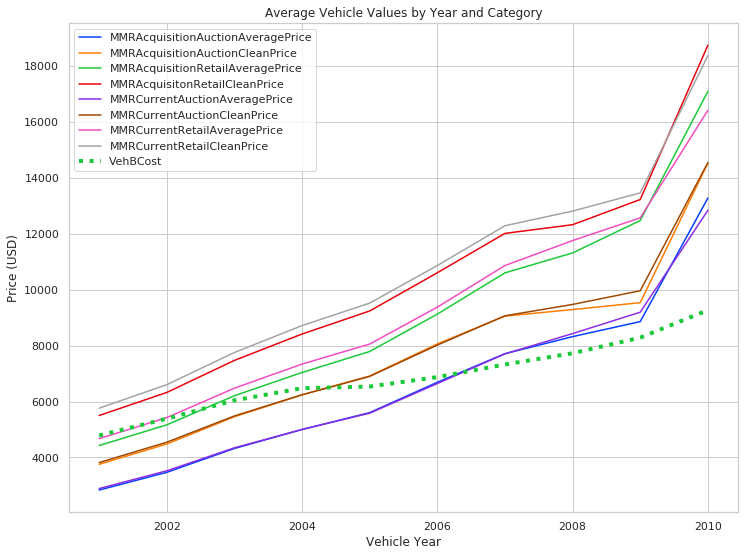

In [148]:

sns.set(style='whitegrid',palette='bright')
plt.figure(figsize=(12,9))
plt.plot(linedf.drop(['VehBCost'],1), label=linedf.columns)
plt.plot(linedf.VehBCost,label="Vehicle Cost",color='g',linestyle='dotted',linewidth=4)
plt.legend(labels=linedf.columns)
plt.title("Average Vehicle Values by Year and Category")
plt.ylabel('Price (USD)')
plt.xlabel('Vehicle Year')

plt.savefig('yearpricet.png',transparant=True)

In [265]:
plodf= df[['MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'IsBadBuy']].copy()
plodf.dropna(inplace=True)

In [266]:
plodf['aaap_caap'] = plodf.MMRAcquisitionAuctionAveragePrice - plodf.MMRCurrentAuctionAveragePrice
plodf['aacp_cacp'] = plodf.MMRAcquisitionAuctionCleanPrice - plodf.MMRCurrentAuctionCleanPrice
plodf['arap_crap'] = plodf.MMRAcquisitionRetailAveragePrice - plodf.MMRCurrentRetailAveragePrice
plodf['arcp_crcp'] = plodf.MMRAcquisitonRetailCleanPrice - plodf.MMRCurrentRetailCleanPrice

In [271]:
plodf['crcp_cacp'] = plodf.MMRCurrentRetailCleanPrice - plodf.MMRCurrentAuctionCleanPrice
plodf['arcp_aacp'] = plodf.MMRAcquisitonRetailCleanPrice - plodf.MMRAcquisitionAuctionCleanPrice
plodf['crap_caap'] = plodf.MMRCurrentRetailAveragePrice - plodf.MMRCurrentAuctionAveragePrice
plodf['arap_aaap'] = plodf.MMRAcquisitionRetailAveragePrice - plodf.MMRAcquisitionAuctionAveragePrice

In [267]:
plonull = plodf.isnull().sum()
plonull

MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
IsBadBuy                             0
aaap_caap                            0
aacp_cacp                            0
arap_crap                            0
arcp_crcp                            0
dtype: int64

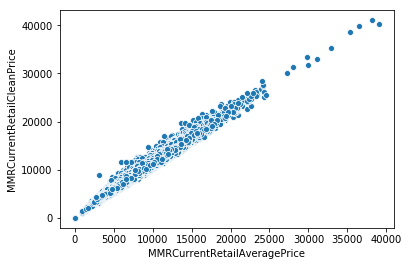

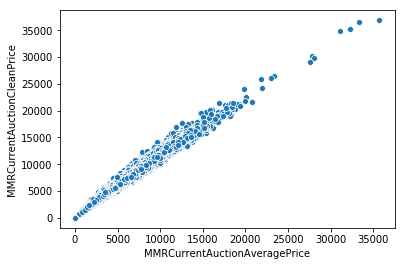

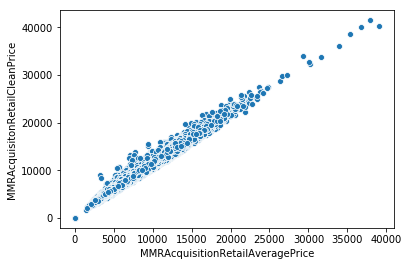

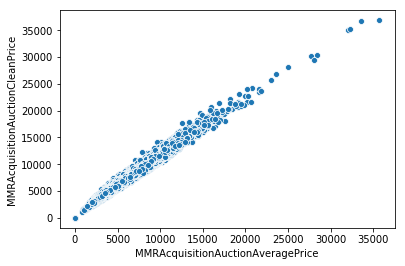

In [252]:
sns.scatterplot(x='MMRCurrentRetailAveragePrice',y='MMRCurrentRetailCleanPrice',data=plodf)
plt.show()
sns.scatterplot(x='MMRCurrentAuctionAveragePrice',y='MMRCurrentAuctionCleanPrice',data=plodf)
plt.show()
sns.scatterplot(x='MMRAcquisitionRetailAveragePrice',y='MMRAcquisitonRetailCleanPrice',data=plodf)
plt.show()
sns.scatterplot(x='MMRAcquisitionAuctionAveragePrice',y='MMRAcquisitionAuctionCleanPrice',data=plodf)
plt.show()

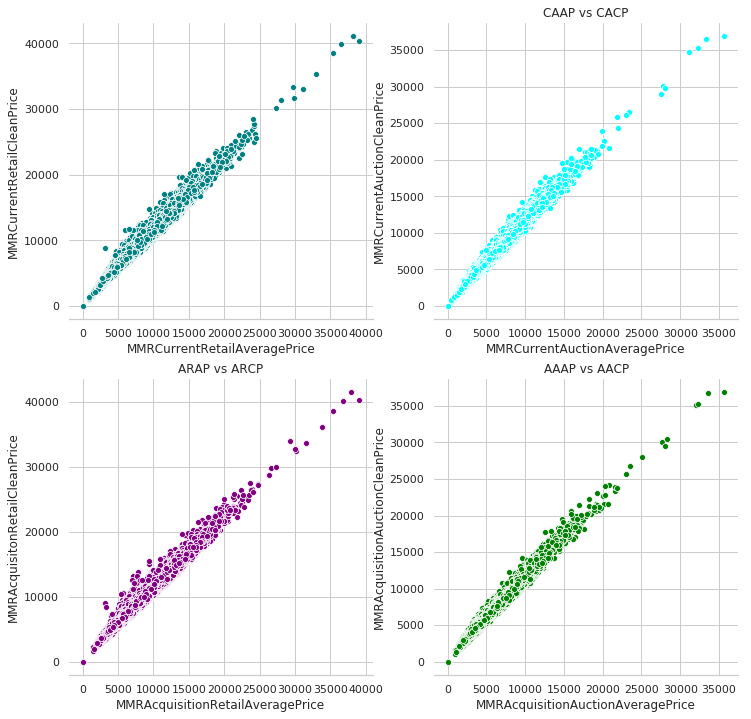

In [278]:
sns.set(style="whitegrid")
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False)
sns.despine(left=True)
sns.scatterplot(x='MMRCurrentRetailAveragePrice',y='MMRCurrentRetailCleanPrice',color='teal',data=plodf, ax=axes[0, 0]).set_title('CRAP vs CRCP',color='white')
sns.scatterplot(x='MMRCurrentAuctionAveragePrice',y='MMRCurrentAuctionCleanPrice',color='aqua',data=plodf,ax=axes[0, 1]).set_title("CAAP vs CACP")
sns.scatterplot(x='MMRAcquisitionRetailAveragePrice',y='MMRAcquisitonRetailCleanPrice',color='purple',data=plodf,ax=axes[1, 0]).set_title('ARAP vs ARCP')
sns.scatterplot(x='MMRAcquisitionAuctionAveragePrice',y='MMRAcquisitionAuctionCleanPrice',color='green',data=plodf, ax=axes[1, 1]).set_title('AAAP vs AACP')
plt.savefig('subplotcosts.png')

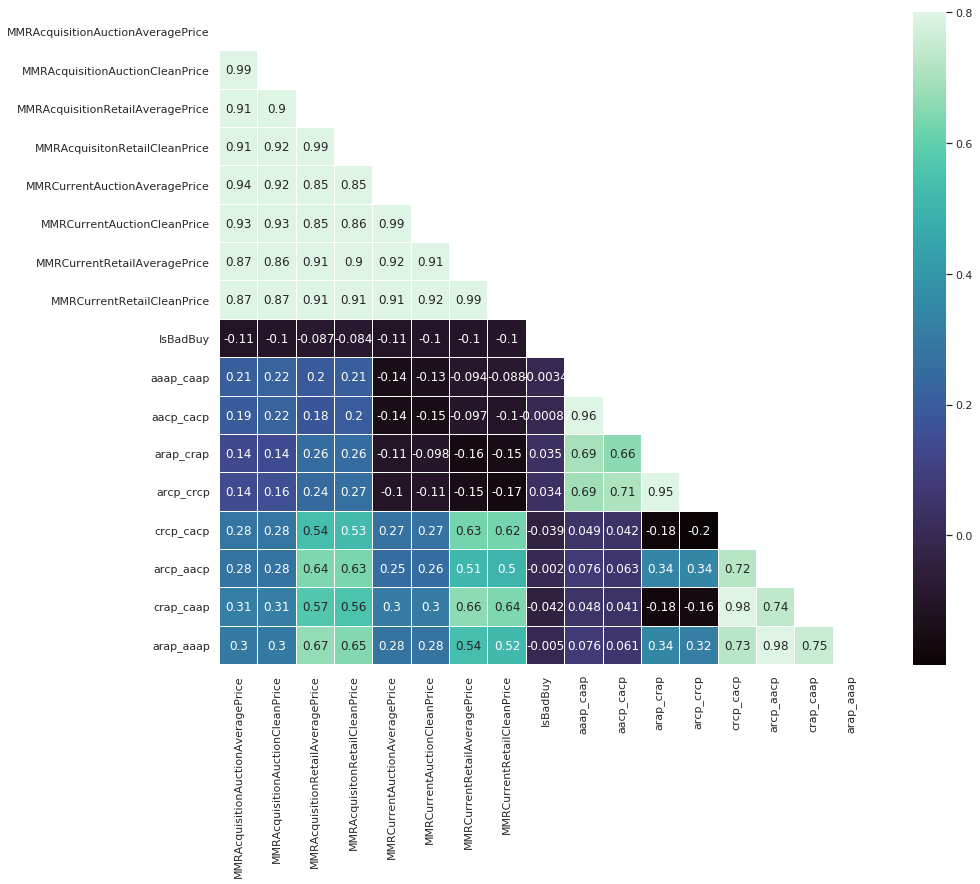

In [272]:
corrmat = plodf.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
    
with sns.axes_style('white'):    
    ax = plt.subplots(figsize=(15,12))

    sns.heatmap(corrmat,
            vmax=.8, 
            cmap="mako",
            annot=True,
            linewidth=.05,
            square=True,
            mask=mask)


plt.show()

<Figure size 864x648 with 0 Axes>

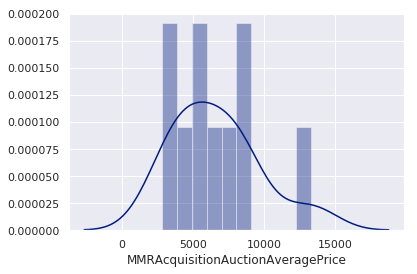

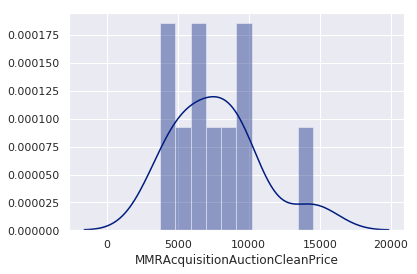

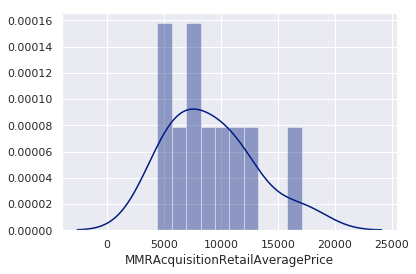

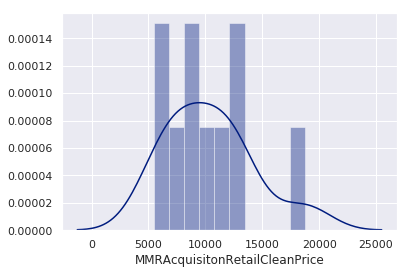

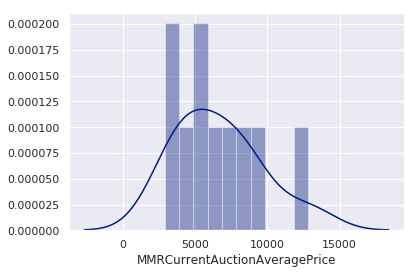

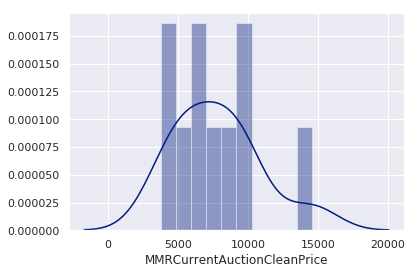

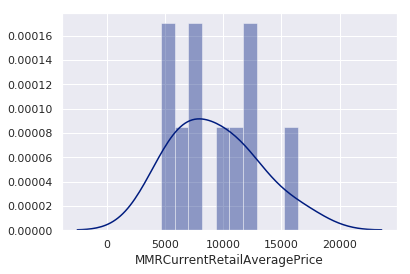

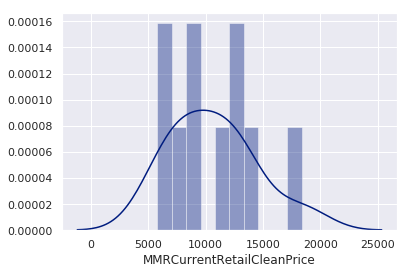

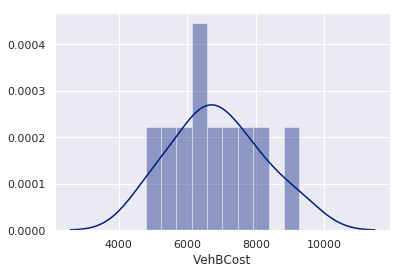

In [113]:
plt.figure(figsize=(12,9))
for col in linedf:
    plt.figure()
    sns.distplot(linedf[col],bins=10)
    plt.show()

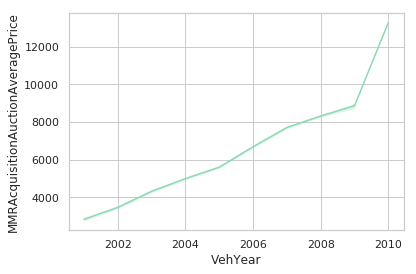

In [80]:
plt.figure()
sns.lineplot(y='MMRAcquisitionAuctionAveragePrice',x='VehYear',data=df)
plt.plot


In [130]:
import plotly
plotly.tools.set_credentials_file(username='extralime', api_key='q3tUGZrv40fkKyR4uPuL')
import plotly.plotly as py

In [134]:
import plotly.graph_objs as go

In [170]:
list(linedf)

['VehYear',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'VehBCost']

In [173]:
trace0 = go.Scatter(
    x = linedf.VehYear,
    y = linedf.MMRAcquisitionAuctionAveragePrice,
    mode = 'lines',
    name = 'lines'
)
trace1 = go.Scatter(
    x = linedf.VehYear,
    y = linedf.MMRCurrentAuctionAveragePrice,
    mode = 'lines+markers',
    name = 'lines+markers'
)
trace2 = go.Scatter(
    x = linedf.VehYear,
    y = linedf.VehBCost,
    mode = 'lines+markers',
    name = 'lines+markers'
)
data = [trace0, trace1, trace2]

py.iplot(data, filename='line-mode')

In [174]:
linedf.columns

Index(['VehYear', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost'],
      dtype='object')

In [190]:
colors = cl.to_rgb(cl.scales['10']['div']['BrBG'])
# Create and style traces
trace0 = go.Scatter(
    x = linedf.VehYear,
    y = linedf.MMRAcquisitionAuctionAveragePrice,
    name = 'MMRAcquisitionAuctionAveragePrice',
    line = dict(
        color = colors[7],
        width = 2,
        dash = 'dot')
)
trace1 = go.Scatter(
    x = linedf.VehYear,
    y = linedf.MMRAcquisitionAuctionCleanPrice,
    name = 'MMRAcquisitionAuctionCleanPrice',
    line = dict(
        color = colors[8],
        width = 2,
        dash = 'dot')
)
trace2 = go.Scatter(
    x = linedf.VehYear,
    y = linedf.MMRAcquisitionRetailAveragePrice,
    name = 'MMRAcquisitionRetailAveragePrice',
    line = dict(
        color = colors[9],
        width = 3)
         # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = linedf.VehYear,
    y = linedf.MMRAcquisitonRetailCleanPrice,
    name = 'MMRAcquisitonRetailCleanPrice',
    line = dict(
        color = colors[6],
        width = 3)
)
trace4 = go.Scatter(
    x = linedf.VehYear,
    y = linedf.MMRCurrentAuctionAveragePrice,
    name = 'MMRCurrentAuctionAveragePrice',
    line = dict(
        color = colors[3],
        width = 2,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = linedf.VehYear,
    y = linedf.MMRCurrentAuctionCleanPrice,
    name = 'MMRCurrentAuctionCleanPrice',
    line = dict(
        color = colors[4],
        width = 2,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = linedf.VehYear,
    y = linedf.MMRCurrentRetailAveragePrice,
    name = 'MMRCurrentRetailAveragePrice',
    line = dict(
        color = colors[2],
        width = 3)
)
trace7 = go.Scatter(
    x = linedf.VehYear,
    y = linedf.MMRCurrentRetailCleanPrice,
    name = 'MMRCurrentRetailCleanPrice',
    line = dict(
        color = colors[1],
        width = 3)
)
trace8 = go.Scatter(
    x = linedf.VehYear,
    y = linedf.VehBCost,
    name = 'Vehicle Cost',
    line = dict(
        color = colors[0],
        width = 4)
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8]

# Edit the layout
layout = dict(title = 'Average Vehicle Valuation by Year and Category',
              xaxis = dict(title = 'Vehicle Year'),
              yaxis = dict(title = 'Price (USD)'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~extralime/0 or inside your plot.ly account where it is named 'styled-line'


In [150]:
linedf

,VehYear,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost
0,2001.0,2831.582039,3752.988521,4425.323430,5498.975692,2885.062965,3815.591740,4670.718348,5760.503724,4783.818028
1,2002.0,3465.906608,4480.409985,5165.341263,6323.536858,3520.013549,4543.667158,5424.122533,6601.666274,5386.123348
2,2003.0,4320.002570,5454.244177,6206.238394,7471.123213,4343.285576,5483.376573,6476.094063,7754.151500,6042.741208
3,2004.0,4996.823529,6238.421667,7038.925294,8414.764804,5000.774552,6240.798071,7338.384373,8715.710687,6476.195552
4,2005.0,5601.968750,6914.032154,7789.342523,9239.055333,5582.250049,6898.472998,8055.749692,9520.216467,6535.958864
5,2006.0,6686.941560,8059.365781,9126.889280,10606.092707,6643.073433,8019.068844,9377.123213,10864.454134,6873.400527
6,2007.0,7711.329800,9055.279345,10603.524877,12015.033111,7705.149233,9067.245243,10864.997107,12289.039895,7326.492006
7,2008.0,8321.401511,9289.771790,11316.235038,12325.675915,8429.657613,9472.964322,11758.796506,12813.348113,7726.887149
8,2009.0,8858.973236,9535.428224,12475.105839,13226.967153,9195.418023,9962.287860,12570.964956,13463.493116,8285.011788
9,2010.0,13278.000000,14529.000000,17097.000000,18745.000000,12840.000000,14549.000000,16419.000000,18374.000000,9270.000000


In [159]:
import colorlover as cl
from IPython.display import HTML
print(HTML(cl.to_html( cl.scales['9']['div']['RdYlBu'] )))
colors = cl.to_rgb(cl.scales['10']['div']['RdYlBu'])
colors

In [163]:
HTML(cl.to_html( cl.scales['9']['div']['RdYlBu'] ))
colors = cl.to_rgb(cl.scales['10']['div']['RdYlBu'])

In [164]:
colors

['rgb(165,0,38)',
 'rgb(215,48,39)',
 'rgb(244,109,67)',
 'rgb(253,174,97)',
 'rgb(254,224,144)',
 'rgb(224,243,248)',
 'rgb(171,217,233)',
 'rgb(116,173,209)',
 'rgb(69,117,180)',
 'rgb(49,54,149)']

In [169]:
linedf

,VehYear,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost
0,2001.0,2831.582039,3752.988521,4425.323430,5498.975692,2885.062965,3815.591740,4670.718348,5760.503724,4783.818028
1,2002.0,3465.906608,4480.409985,5165.341263,6323.536858,3520.013549,4543.667158,5424.122533,6601.666274,5386.123348
2,2003.0,4320.002570,5454.244177,6206.238394,7471.123213,4343.285576,5483.376573,6476.094063,7754.151500,6042.741208
3,2004.0,4996.823529,6238.421667,7038.925294,8414.764804,5000.774552,6240.798071,7338.384373,8715.710687,6476.195552
4,2005.0,5601.968750,6914.032154,7789.342523,9239.055333,5582.250049,6898.472998,8055.749692,9520.216467,6535.958864
5,2006.0,6686.941560,8059.365781,9126.889280,10606.092707,6643.073433,8019.068844,9377.123213,10864.454134,6873.400527
6,2007.0,7711.329800,9055.279345,10603.524877,12015.033111,7705.149233,9067.245243,10864.997107,12289.039895,7326.492006
7,2008.0,8321.401511,9289.771790,11316.235038,12325.675915,8429.657613,9472.964322,11758.796506,12813.348113,7726.887149
8,2009.0,8858.973236,9535.428224,12475.105839,13226.967153,9195.418023,9962.287860,12570.964956,13463.493116,8285.011788
9,2010.0,13278.000000,14529.000000,17097.000000,18745.000000,12840.000000,14549.000000,16419.000000,18374.000000,9270.000000


In [ ]:
title = 'Average Valuation by Year and Category'

labels = linedf.index

colors = colors

mode_size = [6,7,8 9,10,11 , 8,]

line_size = [2, 2, 4, 2]

x_data = linedf.VehYear


y_data = [
    [74, 82, 80, 74, 73, 72, 74, 70, 70, 66, 66, 69],
    [45, 42, 50, 46, 36, 36, 34, 35, 32, 31, 31, 28],
    [13, 14, 20, 24, 20, 24, 24, 40, 35, 41, 43, 50],
    [18, 21, 18, 21, 16, 14, 13, 18, 17, 16, 19, 23],
]

traces = []

for i in range(0, 4):
    traces.append(go.Scatter(
        x=x_data[i],
        y=y_data[i],
        mode='lines',
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
    ))

    traces.append(go.Scatter(
        x=[x_data[i][0], x_data[i][11]],
        y=[y_data[i][0], y_data[i][11]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))

layout = go.Layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickcolor='rgb(204, 204, 204)',
        tickwidth=2,
        ticklen=5,
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}%'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[11],
                                  xanchor='left', yanchor='middle',
                                  text='{}%'.format(y_trace[11]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Main Source for News',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Source: PewResearch Center & ' +
                                   'Storytelling with data',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

layout['annotations'] = annotations

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='news-source')

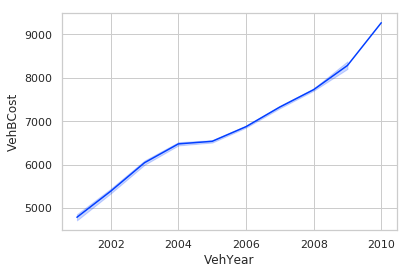

In [152]:
plt.figure()
sns.lineplot(y='VehBCost',x='VehYear',data=df)

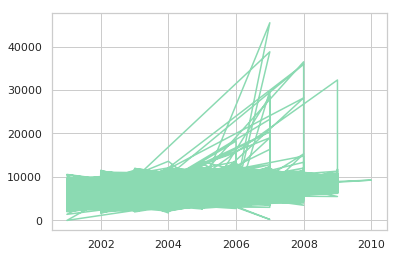

In [81]:
plt.plot(df.VehYear,df.VehBCost)

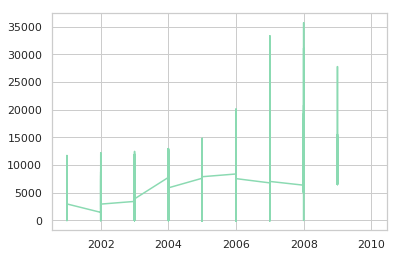

In [87]:
df.sort_values(by='VehYear',inplace=True)
plt.plot(df.VehYear,df.MMRCurrentAuctionAveragePrice)

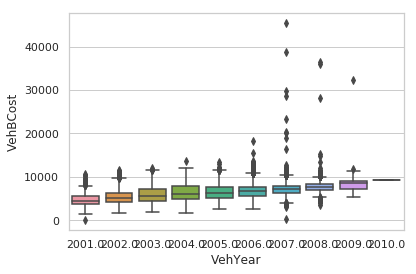

In [89]:
sns.boxplot(x='VehYear',y='VehBCost',data=df)

In [59]:
#the goal is predict badbuy
#drop problematic, irrelevant and null data
df.drop(['RefId', 'BYRNO', 'AUCGUART', 'PRIMEUNIT','PurchDate','VNST'], axis=1, inplace=True)


In [72]:
df.select_dtypes('object','int').columns

Index(['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName'],
      dtype='object')

In [12]:
df.shape

(67270, 29)

In [13]:
if df.isnull().sum().sum() == 0:
    print("No Missing Data")

No Missing Data


In [23]:
pair_plot_df = df.select_dtypes(['int64','float64'])

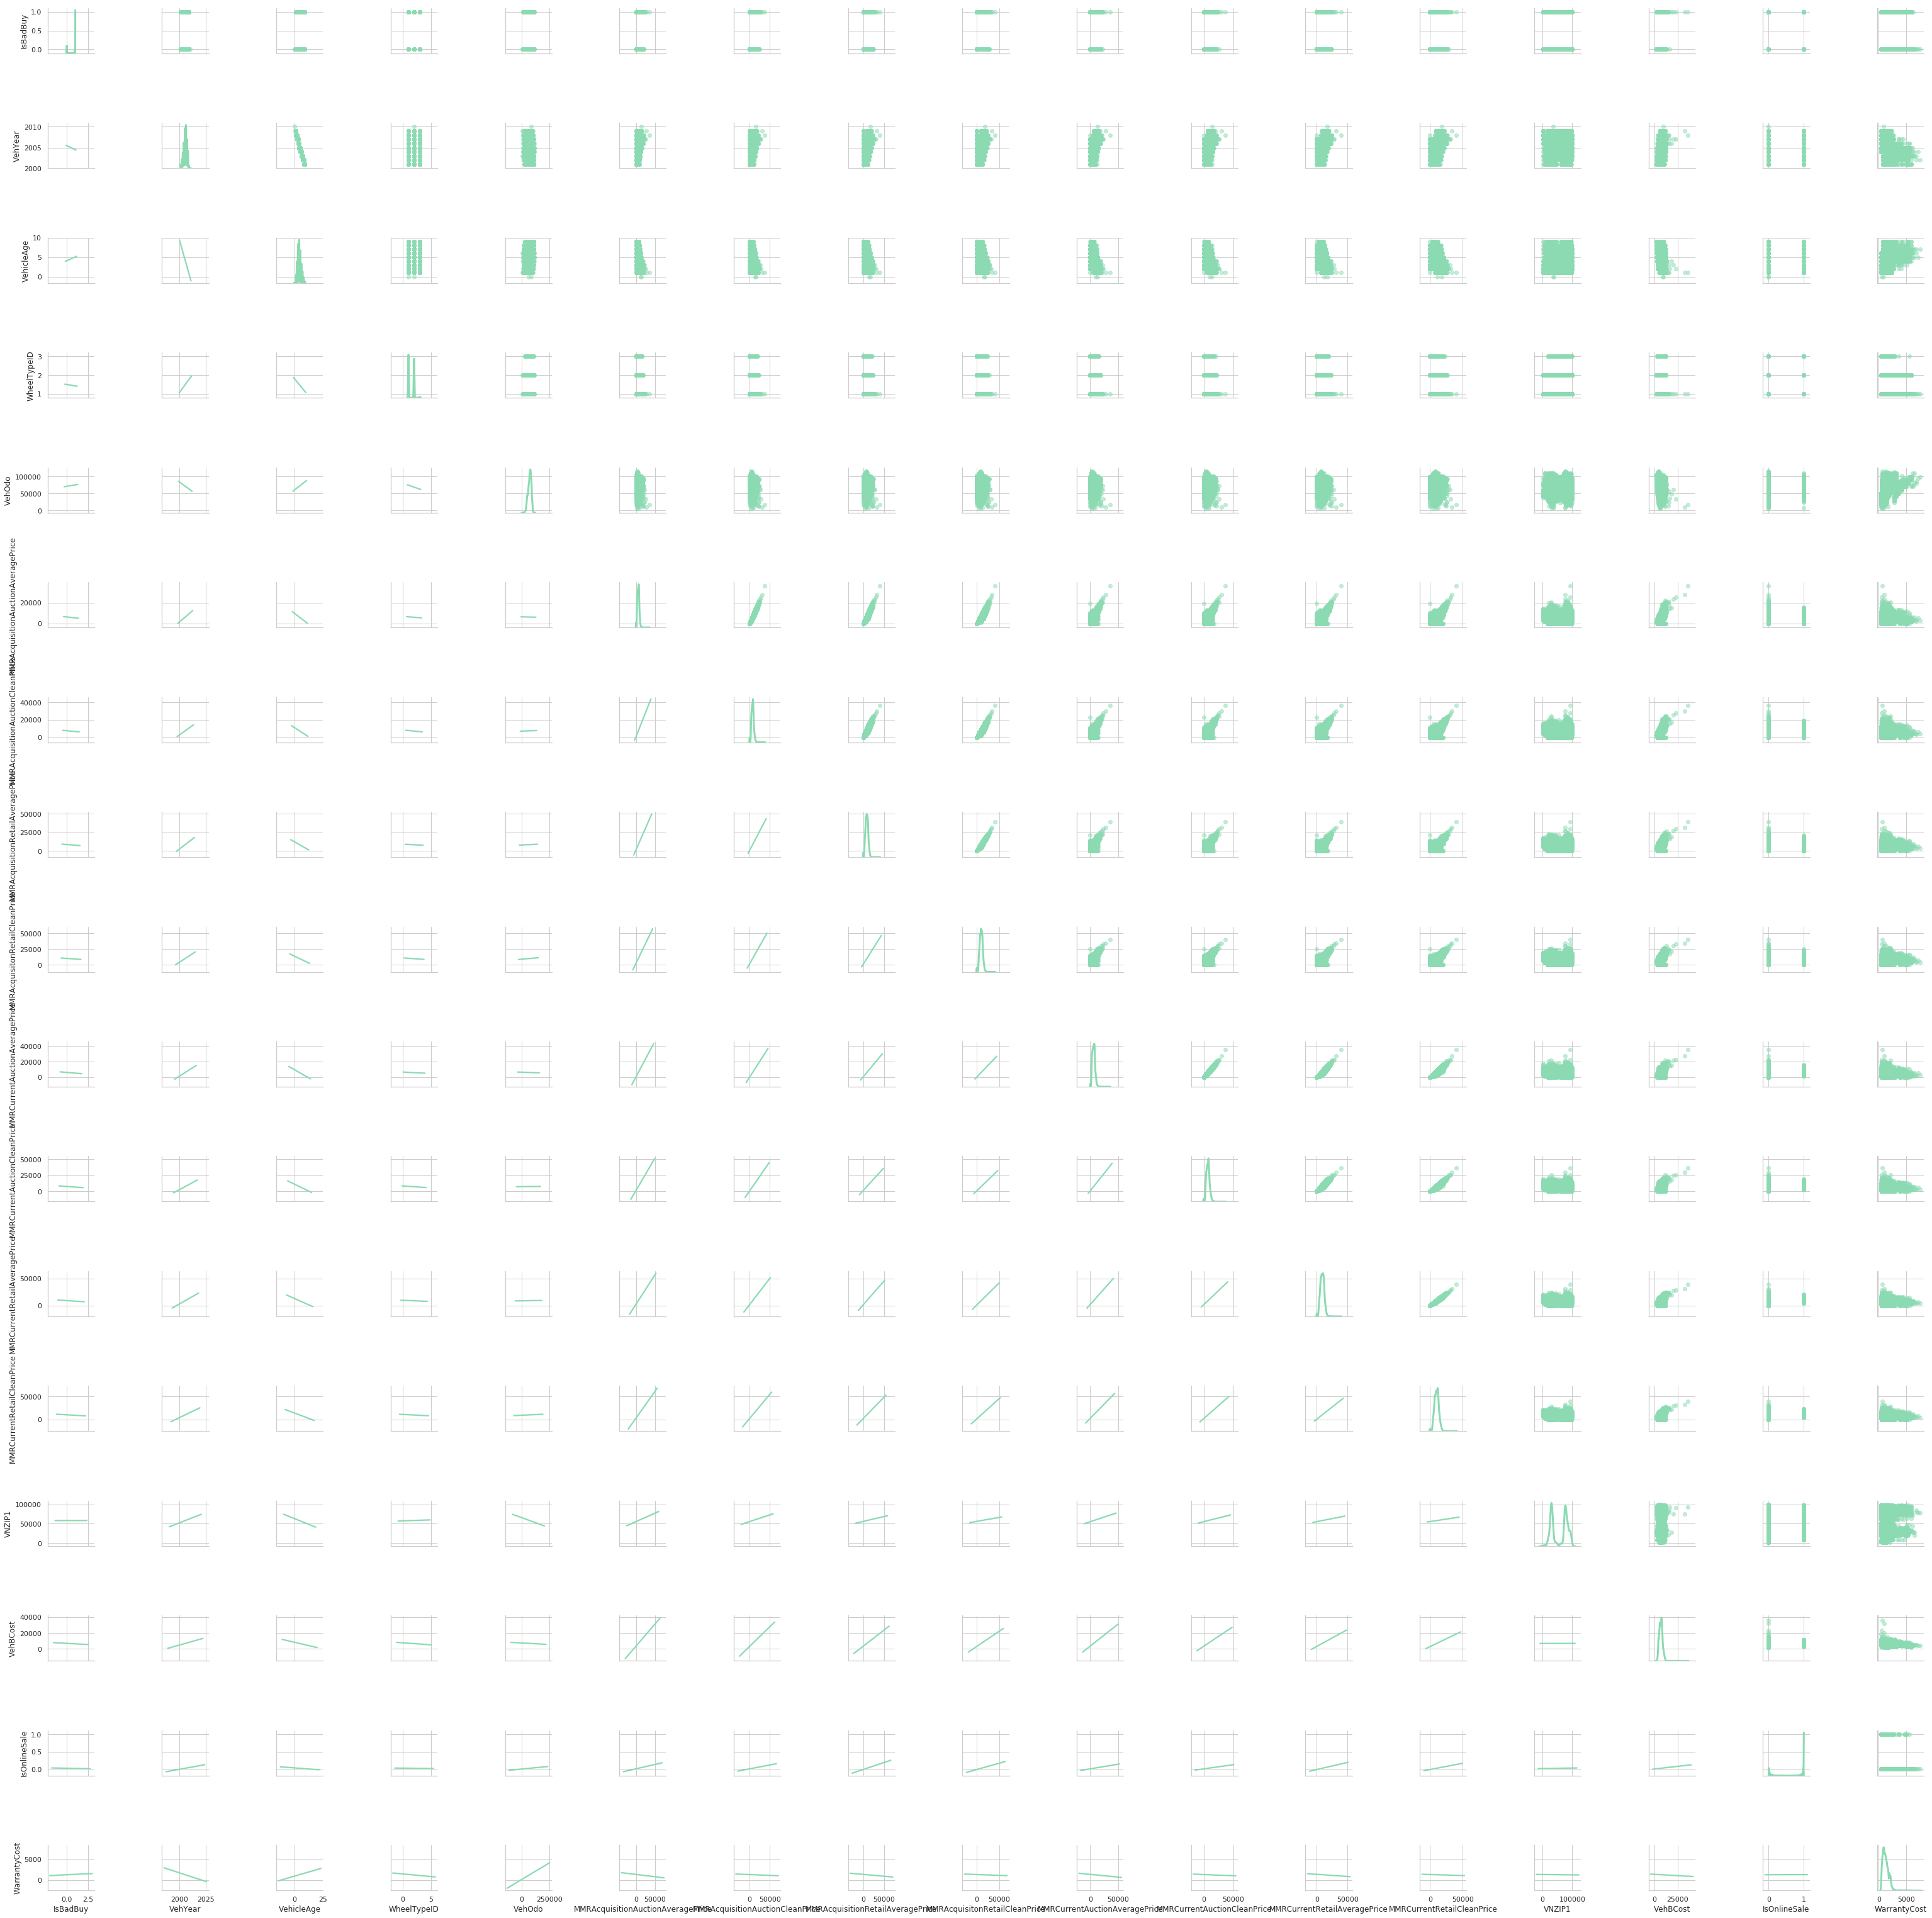

In [24]:
#A quick visuaization,
sns.set(style='whitegrid',palette='mako_r')
g = sns.PairGrid(pair_plot_df, diag_sharey=False)

g.map_upper(plt.scatter, alpha=.5)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=3)

plt.savefig('lemon_pair.png')

In [17]:
y = df.IsBadBuy
X = df.drop(['IsBadBuy'],1)
X = pd.get_dummies(X)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.5,random_state=42)

In [25]:
testdf = pd.read_csv('lemon_test.csv')

In [27]:
list(testdf)

['RefId',
 'PurchDate',
 'Auction',
 'VehYear',
 'VehicleAge',
 'Make',
 'Model',
 'Trim',
 'SubModel',
 'Color',
 'Transmission',
 'WheelTypeID',
 'WheelType',
 'VehOdo',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'PRIMEUNIT',
 'AUCGUART',
 'BYRNO',
 'VNZIP1',
 'VNST',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost']

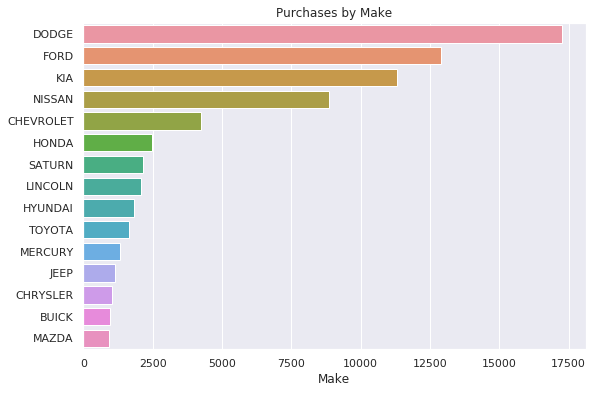

In [211]:
sns.set(palette='mako_r')
plt.figure(figsize=(9,6))

sns.barplot(y=df.Make.unique()[:15],x=df.Make.value_counts()[:15])
plt.title('Purchases by Make')
plt.show()

In [212]:
bad = df[df.IsBadBuy == 1]

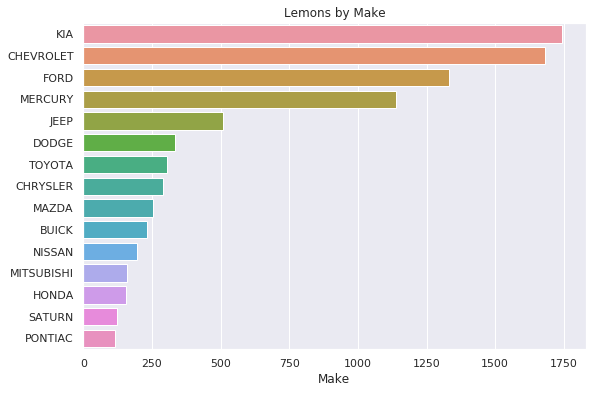

In [214]:
sns.set(palette='mako_r')
plt.figure(figsize=(9,6))

sns.barplot(y=bad.Make.unique()[:15],x=bad.Make.value_counts()[:15])
plt.title('Lemons by Make')
plt.show()

In [280]:
class0 = df[df.IsBadBuy == 0]
class1 = df[df.IsBadBuy == 1]
lemon_pct = class1.Make.value_counts()/df.Make.value_counts()

In [281]:
class0 = df[df.IsBadBuy == 0]
class1 = df[df.IsBadBuy == 1]
lemon_pct = class1.Make.value_counts()/df.Make.value_counts()
lemon_pct = lemon_pct.dropna().reset_index().sort_values(by='Make',ascending=False)
lemon_pct.Make = [ round(x*100,2) for x in lemon_pct.Make]
lemon_model_pct = class1.Model.value_counts()/class0.Model.value_counts()
lemon_model_pct = lemon_model_pct.dropna().reset_index().sort_values(by='Model',ascending=False)

In [282]:
lemon_pct.Make = [ round(x*100,2) for x in lemon_pct.Make]

In [283]:
lemon_model_pct = class1.Model.value_counts()/class0.Model.value_counts()
lemon_model_pct = lemon_model_pct.dropna().reset_index().sort_values(by='Model',ascending=False)

In [284]:
lemon_model_pct = lemon_model_pct.dropna().reset_index().sort_values(by='Model',ascending=False)

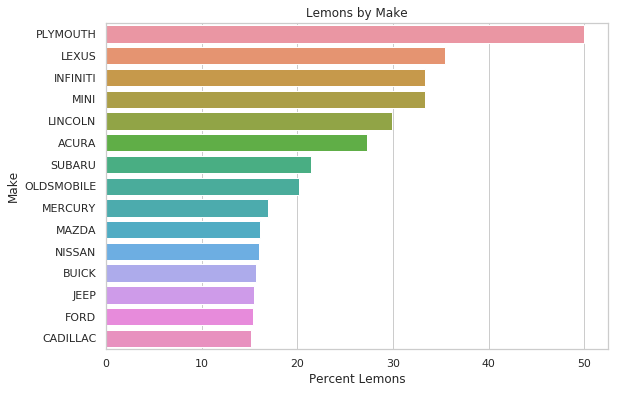

In [288]:
class0 = df[df.IsBadBuy == 0]
class1 = df[df.IsBadBuy == 1]
lemon_pct = class1.Make.value_counts()/df.Make.value_counts()
lemon_pct = lemon_pct.dropna().reset_index().sort_values(by='Make',ascending=False)
lemon_pct.Make = [ round(x*100,2) for x in lemon_pct.Make]
lemon_model_pct = class1.Model.value_counts()/class0.Model.value_counts()
lemon_model_pct = lemon_model_pct.dropna().reset_index().sort_values(by='Model',ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(x='Make',y='index',data=lemon_pct.head(15))
plt.title('Lemons by Make')
plt.ylabel('Make')
plt.xlabel('Percent Lemons')
plt.show()

In [281]:
len(df.Model)

72983

In [227]:

lemon_pct = [round(x*100,2) for x in lemon_pct]

In [229]:
print(lemon_pct)

[37.5, 18.62, 17.86, 10.8, 14.75, 11.51, 18.22, 13.07, 12.19, 14.77, 50.0, 7.2, 18.27, 13.32, 55.0, 42.65, 19.24, 20.45, 50.0, 13.56, 19.01, 25.26, 100.0, 13.52, 16.48, 9.32, 27.27, 17.21, 11.07, 16.52]


In [46]:
print("Class Balance:")
print("Number of Lemons: {}".format(df.IsBadBuy.sum()))
print('Number of Peaches: {}'.format(len(df.IsBadBuy)-df.IsBadBuy.sum()))
print('Occurance Rate: {}%'.format(round(df.IsBadBuy.mean(),4)*100))

Class Balance:
Number of Lemons: 8976
Number of Peaches: 64007
Occurance Rate: 12.3%


In [174]:
print("IsOnlineSale:")
print("Number of Vehicles Purcahsed Online: {}".format(df.IsOnlineSale.sum()))
print('Number of Vehicles Purchased not Online: {}'.format(len(df.IsOnlineSale)-df.IsOnlineSale.sum()))
print('Occurance Rate: {}%'.format(round(df.IsOnlineSale.mean(),4)*100))

IsOnlineSale:
Number of Vehicles Purcahsed Online: 1845
Number of Vehicles Purchased not Online: 71138
Occurance Rate: 2.53%


In [48]:
df.dtypes.value_counts()

object     15
float64    10
int64       9
dtype: int64